**Importations**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud
from PIL import Image

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DARIDOR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DARIDOR\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DARIDOR\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Données**

In [2]:
df = pd.read_csv('sentiment_insults_trump.csv')

In [3]:
df.head()

,date,target,insult,tweet,year,sentiment,sentiment_label
0,2014-10-09,thomas-frieden,fool,"Can you believe this fool, Dr. Thomas Frieden ...",2014.0,0.0000,neutral
1,2014-10-09,thomas-frieden,DOPE,"Can you believe this fool, Dr. Thomas Frieden ...",2014.0,0.0000,neutral
2,2015-06-16,politicians,all talk and no action,Big time in U.S. today - MAKE AMERICA GREAT AG...,2015.0,0.2375,positive
3,2015-06-24,ben-cardin,It's politicians like Cardin that have destroy...,Politician @SenatorCardin didn't like that I s...,2015.0,0.0000,neutral
4,2015-06-24,neil-young,total hypocrite,"For the nonbeliever, here is a photo of @Neily...",2015.0,0.0000,neutral


In [4]:
df.drop(['date', 'target', 'insult', 'year', 'sentiment'], axis = 1, inplace = True)

In [5]:
df.duplicated().sum()

4687

In [6]:
df = df.drop_duplicates()

In [7]:
df.head()

,tweet,sentiment_label
0,"Can you believe this fool, Dr. Thomas Frieden ...",neutral
2,Big time in U.S. today - MAKE AMERICA GREAT AG...,positive
3,Politician @SenatorCardin didn't like that I s...,neutral
4,"For the nonbeliever, here is a photo of @Neily...",neutral
5,".@Neilyoung’s song, “Rockin’ In The Free World...",positive


**Text Mining**

In [8]:
stop_words = set(stopwords.words('english'))
stop_words.update(['.', ',', '!', '?', "'", ';', ':', '/', '-' ])

In [9]:
# Nettoyage des tweets :

def clean(text):
    #     remove urls
    text = re.sub(r'http\S+', " ", text)
    #     remove mentions
    text = re.sub(r'@\w+',' ',text)
    #     remove hastags
    text = re.sub(r'#\w+', ' ', text)
    #     remove digits
    text = re.sub(r'\d+', ' ', text)
    #     remove html tags
    text = re.sub('r<.*?>',' ', text) 
    #     remove stop words 
    text = text.split()
    text = " ".join([word for word in text if not word in stop_words])
    
    return text

In [10]:
df['tweet'] = df['tweet'].apply(lambda x: clean(x))

In [11]:
df.head()

,tweet,sentiment_label
0,"Can believe fool, Dr. Thomas Frieden CDC, stat...",neutral
2,Big time U.S. today MAKE AMERICA GREAT AGAIN! ...,positive
3,Politician like I said Baltimore needs jobs & ...,neutral
4,"For nonbeliever, photo office $$ request—total...",neutral
5,"’s song, “Rockin’ In The Free World” one songs...",positive


**WordCloud**

In [12]:
text = ''
for tweet in df['tweet']:
    text = text + " " + tweet
text  

' Can believe fool, Dr. Thomas Frieden CDC, stated, "anyone fever asked West Africa" DOPE Big time U.S. today MAKE AMERICA GREAT AGAIN! Politicians talk action never bring us back. Politician like I said Baltimore needs jobs & spirit. It\'s politicians like Cardin destroyed Baltimore. For nonbeliever, photo office $$ request—total hypocrite. ’s song, “Rockin’ In The Free World” one songs used background music. Didn’t love anyway. Uncomfortable looking NBC reporter Willie Geist calls ask favors mockingly smiles told high poll numbers Just out, new nationwide poll alone nd place, closely behind Jeb Bush-but Bush NEVER Make America Great Again! The ratings The View really low. Nicole Wallace Molly Sims disaster. Get new cast put sleep. Dead T.V. better surround better hosts Nicole Wallace, clue. The show close death! I hear dopey political pundit, Lawrence O\'Donnell, one dumber people television, lose show-no ratings?Too bad Governor Rick Scott Florida really poorly television morning. I

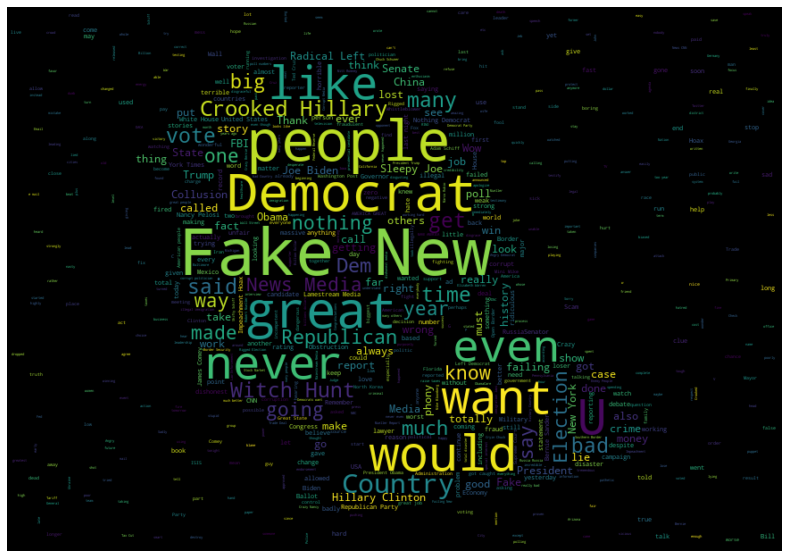

In [13]:
mask = np.array(Image.open('trump.png'))

wc = WordCloud(max_words = 5000, mask = mask, stopwords = stop_words)
wc.generate(text)

plt.figure(figsize = (20,10)) 
plt.imshow(wc, interpolation ='bilinear')
plt.axis('off')
plt.show()

**Analyse de sentiments**

In [14]:
# Encodage de la variable 'sentiment_label' :
label_encoder = LabelEncoder()
df['sentiment_label'] = label_encoder.fit_transform(df['sentiment_label'])

In [15]:
# Lemmatisation
wordnet = WordNetLemmatizer()

for row in df['tweet']:
    word_list = word_tokenize(row)
    df['tweet'] = df['tweet'].replace(' '.join([wordnet.lemmatize(w) for w in word_list]))


In [16]:
df.head()

,tweet,sentiment_label
0,"Can believe fool, Dr. Thomas Frieden CDC, stat...",1
2,Big time U.S. today MAKE AMERICA GREAT AGAIN! ...,2
3,Politician like I said Baltimore needs jobs & ...,1
4,"For nonbeliever, photo office $$ request—total...",1
5,"’s song, “Rockin’ In The Free World” one songs...",2


In [17]:
# Séparation des données :
X_train, X_test, y_train, y_test = train_test_split(df['tweet'], df['sentiment_label'], test_size = 0.2)

In [18]:
# Vectorisation :
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [19]:
# On utilise un Gradient Boosting :
gbc = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 100, random_state = 42)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)

In [20]:
pd.crosstab(y_test, y_pred)

col_0,0,1,2
sentiment_label,,,
0,453,0,57
1,113,1,1
2,206,1,303


A améliorer...